# Week 3
- Joshua Burden
- DSC630 Predictive Analytics
- Bellevue University
- Andrew Hua
- 09/18/2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Recommendations: 

- It would seem that games played during the summer months along with clear skys are when attendance is the greatest. Recommend that games scheduled in spring and fall, or historically cloudy days should be scheduled less. 

- Games on Tuesdays and Saturdays are often trending towards positive attendance.  Mondays and Wednesdays trend negatively for attendance. If management added more games to the roster on Tuesdays and Saturdays while lowering the game roster of Mondays and Wednesdays could increase attendance

- Games where the dodgers played: 
    - Angeles
    - Cubs 
    - Mets
    - Nationals
    - White Sox
- Saw larger turnout and increased attendance

- Games where the dodgers played:
    - Astros
    - Braves
    - Bruins
    - Pirates
    - Rockies
    - Snakes
- Saw less turnout and a decreased attendance

- Games where there were promotions such as Bobbleheads and shirts had the higher attendance rates. Management should offer more promotions as it would seem that have a positive impact on increasing attendance for the season






In [2]:
df = pd.read_csv('./Week3/dodgers-2022.csv', delimiter=',')
df.head(10)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


In [4]:
print(f'Home games played: {df.shape[0]}')

Home games played: 81


In [5]:
#any nulls or missing
df.isnull().any()

month          False
day            False
attend         False
day_of_week    False
opponent       False
temp           False
skies          False
day_night      False
cap            False
shirt          False
fireworks      False
bobblehead     False
dtype: bool

In [6]:
dates_targets = df[['month','day','day_of_week','day_night']]
dates_targets.head(20)

,month,day,day_of_week,day_night
0,APR,10,Tuesday,Day
1,APR,11,Wednesday,Night
2,APR,12,Thursday,Night
3,APR,13,Friday,Night
4,APR,14,Saturday,Night
5,APR,15,Sunday,Day
6,APR,23,Monday,Night
7,APR,24,Tuesday,Night
8,APR,25,Wednesday,Night
9,APR,27,Friday,Night


In [7]:
desc = dates_targets.describe()
desc

,day
count,81.000000
mean,16.135802
std,9.605666
min,1.000000
25%,8.000000
50%,15.000000
75%,25.000000
max,31.000000


In [8]:
dates_targets['day_night'].value_counts()

Night    66
Day      15
Name: day_night, dtype: int64

c:\Users\Joshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Game Days in a Month')

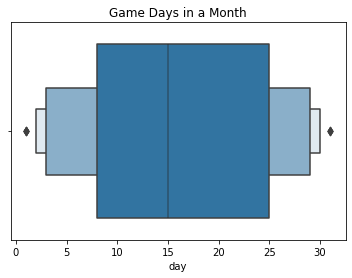

In [9]:
sns.boxenplot(dates_targets['day'])
plt.title("Game Days in a Month")

Text(0, 0.5, 'Attendance')

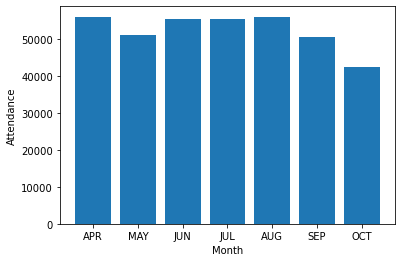

In [10]:
#Checking attendance
plt.bar(df['month'],df['attend'])
plt.xlabel('Month')
plt.ylabel('Attendance')

Text(0, 0.5, 'Attendance')

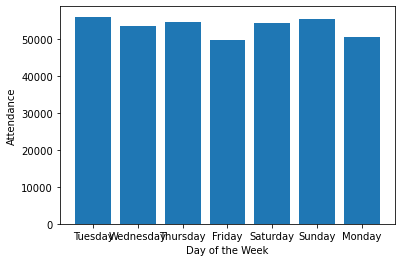

In [11]:
#bar graph visualization for attendance counts for day of the week
plt.bar(df['day_of_week'],df['attend'])
plt.xlabel('Day of the Week')
plt.ylabel('Attendance')

In [14]:
df.attend.mean()

41040.07407407407

In [15]:
df.attend.max()

56000

In [16]:
df.query('attend == 56000')

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
59,AUG,21,56000,Tuesday,Giants,75,Clear,Night,NO,NO,NO,YES


Text(0, 0.5, 'Attendance')

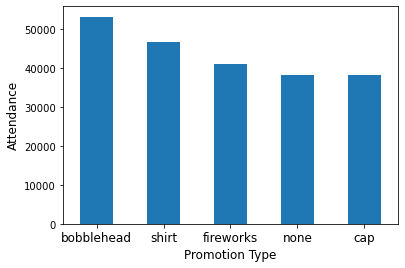

In [17]:
lad = df.groupby(['cap', 'shirt', 'fireworks', 'bobblehead']).attend.mean().sort_values(ascending=False).plot.bar()
lad.set_xticklabels(['bobblehead', 'shirt', 'fireworks', 'none', 'cap'], rotation=0, fontsize=12)
lad.set_xlabel("Promotion Type", fontsize=12)
lad.set_ylabel("Attendance", fontsize=12)

In [18]:
df.bobblehead.value_counts()


NO     70
YES    11
Name: bobblehead, dtype: int64

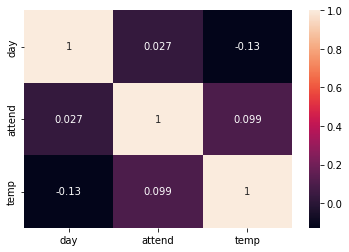

In [19]:

correlation_mat = df.corr()

sns.heatmap(correlation_mat, annot = True)
plt.show()

In [20]:
df1 = pd.concat([df.drop(['month', 'day_of_week', 'opponent','skies','day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'], axis=1), pd.get_dummies(df[['month', 'day_of_week', 'opponent','skies','day_night', 'cap', 'shirt', 'fireworks']])], axis=1)
df1.head(5)

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,...,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES
0,10,56000,67,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,11,29729,58,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
2,12,28328,57,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
3,13,31601,54,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,0,1
4,14,46549,57,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0


In [21]:
df1.corr('spearman').style.background_gradient(cmap="Greens")

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,opponent_Angels,opponent_Astros,opponent_Braves,opponent_Brewers,opponent_Cardinals,opponent_Cubs,opponent_Giants,opponent_Marlins,opponent_Mets,opponent_Nationals,opponent_Padres,opponent_Phillies,opponent_Pirates,opponent_Reds,opponent_Rockies,opponent_Snakes,opponent_White Sox,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES
day,1.000000,0.063626,-0.123692,0.104875,-0.028569,-0.079586,0.108461,0.153172,-0.293820,-0.113057,0.134612,-0.119007,0.083503,0.035273,0.172376,-0.090701,-0.165867,-0.106335,0.179090,0.141313,0.319518,0.038556,-0.237854,-0.216080,0.159502,0.130490,0.225262,-0.188335,0.053167,-0.131519,-0.264438,-0.021860,0.052969,0.029382,0.054252,-0.054252,0.052377,-0.052377,0.194109,-0.194109,0.037777,-0.037777,-0.091546,0.091546
attend,0.063626,1.000000,0.090628,-0.055739,0.101270,0.096614,0.314192,-0.223536,-0.109043,-0.109991,-0.030209,-0.325514,0.128028,0.051787,-0.008776,0.333736,-0.167959,0.204106,-0.156575,-0.167758,-0.134038,0.015034,0.109043,-0.086529,0.002796,0.248580,0.204106,0.038644,-0.011184,-0.082481,-0.030756,-0.082328,-0.089049,0.139799,0.144553,-0.144553,0.031944,-0.031944,0.051039,-0.051039,-0.139799,0.139799,-0.015361,0.015361
temp,-0.123692,0.090628,1.000000,-0.495820,0.296848,0.012656,-0.132964,-0.337159,0.268880,0.527833,-0.167878,-0.024568,-0.044672,0.237768,0.014286,-0.020895,0.010423,-0.184855,-0.226868,-0.278683,-0.059812,0.181659,0.082625,0.196922,0.032210,0.076901,-0.079824,-0.010099,-0.025208,-0.273081,-0.092428,0.161577,0.167468,-0.102230,0.259024,-0.259024,0.249189,-0.249189,-0.066466,0.066466,-0.011203,0.011203,0.178363,-0.178363
month_APR,0.104875,-0.055739,-0.495820,1.000000,-0.198811,-0.173913,-0.147442,-0.222911,-0.081786,-0.173913,0.007013,-0.076087,0.007013,0.007013,0.037438,0.007013,0.021739,-0.081786,-0.081786,0.470270,-0.095050,-0.128262,-0.081786,-0.147442,-0.081786,-0.095050,0.470270,0.184302,-0.081786,0.470270,-0.081786,-0.147442,-0.147442,-0.081786,-0.343251,0.343251,0.069584,-0.069584,0.066354,-0.066354,-0.102233,0.102233,0.006808,-0.006808
month_AUG,-0.028569,0.101270,0.296848,-0.198811,1.000000,-0.198811,-0.168550,-0.254824,-0.093495,-0.198811,0.051309,-0.019881,-0.035275,-0.035275,0.009782,-0.035275,0.069584,-0.093495,-0.093495,-0.093495,-0.108657,-0.146625,0.411377,0.134840,0.411377,-0.108657,-0.093495,-0.168550,-0.093495,-0.093495,-0.093495,0.134840,0.134840,-0.093495,0.188903,-0.188903,0.018182,-0.018182,-0.128951,0.128951,0.093495,-0.093495,-0.034245,0.034245
month_JUL,-0.079586,0.096614,0.012656,-0.173913,-0.198811,1.000000,-0.147442,-0.222911,-0.081786,-0.173913,-0.087664,0.119565,-0.087664,0.007013,-0.106966,0.101690,0.021739,-0.081786,-0.081786,-0.081786,-0.095050,-0.128262,-0.081786,-0.147442,-0.081786,0.065347,-0.081786,0.184302,0.470270,-0.081786,0.470270,-0.147442,0.073721,-0.081786,-0.097204,0.097204,-0.019881,0.019881,-0.157591,0.157591,0.081786,-0.081786,0.006808,-0.006808
month_JUN,0.108461,0.314192,-0.132964,-0.147442,-0.168550,-0.147442,1.000000,-0.188982,-0.069338,-0.147442,0.059456,-0.036860,0.059456,-0.047565,0.072548,-0.047565,-0.036860,0.554700,-0.069338,-0.069338,-0.080582,-0.108740,-0.069338,-0.125000,-0.069338,0.463348,-0.069338,-0.125000,-0.069338,-0.069338,-0.069338,-0.125000,-0.125000,0.554700,0.103011,-0.103011,0.033710,-0.033710,0.056254,-0.056254,-0.138675,0.138675,-0.046176,0.046176
month_MAY,0.153172,-0.223536,-0.337159,-0.222911,-0.254824,-0.222911,-0.188982,1.000000,-0.104828,-0.222911,0.008989,0.027864,0.008989,0.008989,-0.013710,0.008989,-0.055728,-0.104828,0.366900,-0.104828,0.426401,0.152656,-0.104828,0.094491,-0.104828,-0.121829,-0.104828,-0.188982,-0.104828,-0.104828,-0.104828,0.094491,0.000000,-0.104828,0.155738,-0.155738,-0.101929,0.10

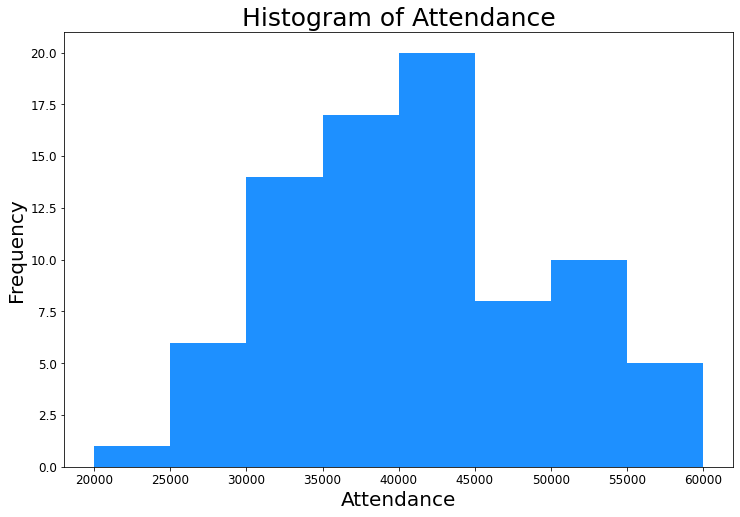

In [34]:
plt.rcParams['figure.figsize'] = [12, 8]
bins = [20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000]
plt.hist(df.attend, bins=bins, color='dodgerblue')
plt.xticks(bins, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Histogram of Attendance", fontsize=25)
plt.xlabel("Attendance", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.show()

Text(0, 0.5, 'Attendance')

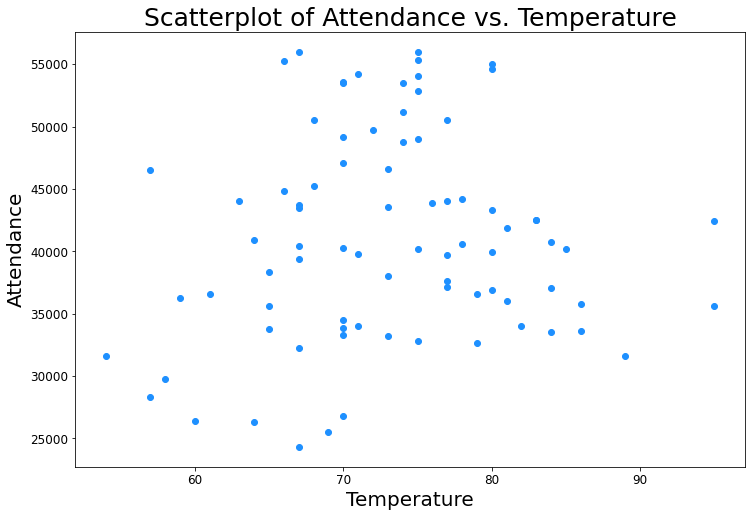

In [42]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.scatter(df.temp, df.attend, color='dodgerblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Scatterplot of Attendance vs. Temperature", fontsize=25)
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Attendance", fontsize=20)

c:\Users\Joshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


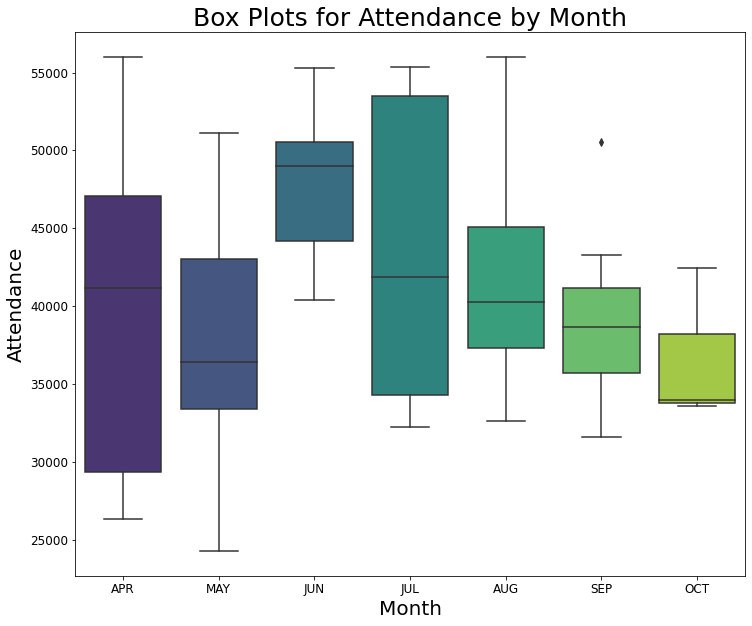

In [24]:
plt.rcParams['figure.figsize'] = [12, 10]
sns.boxplot(df.month, df.attend, palette="viridis")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Box Plots for Attendance by Month", fontsize=25)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Attendance", fontsize=20)
plt.show()

c:\Users\Joshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


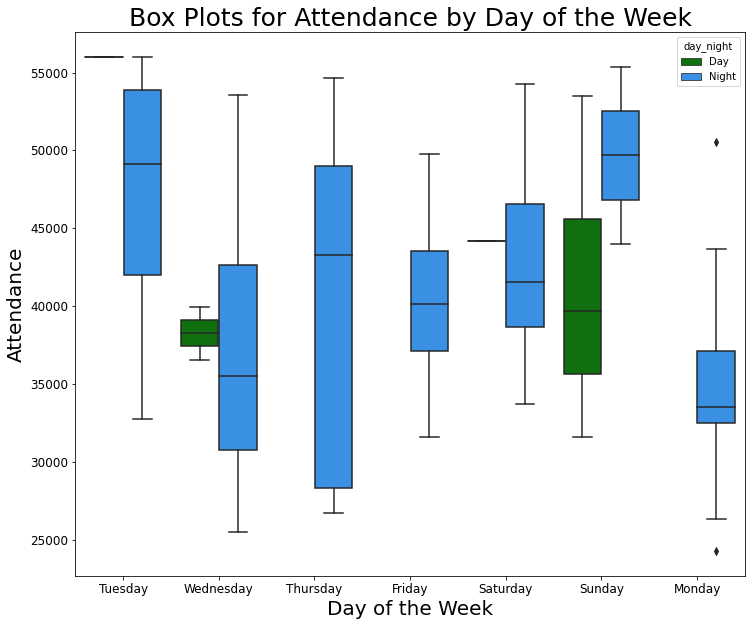

In [41]:
plt.rcParams['figure.figsize'] = [12, 10]
colors = ('green', 'dodgerblue')
sns.boxplot(df.day_of_week, df.attend, hue = df.day_night, palette=colors)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Box Plots for Attendance by Day of the Week", fontsize=25)
plt.xlabel("Day of the Week", fontsize=20)
plt.ylabel("Attendance", fontsize=20)
plt.show()

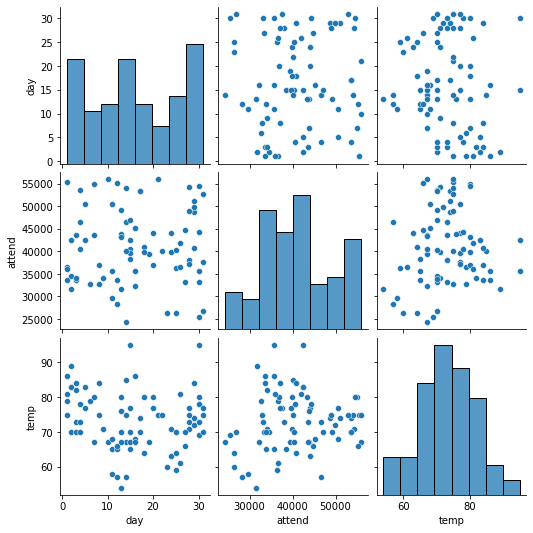

In [27]:

sns.pairplot(df)

In [29]:
df.groupby('month').attend.describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
OCT,3.0,36703.666667,5000.193030,33624.0,33819.00,34014.0,38243.50,42473.0
MAY,18.0,37345.722222,7721.822307,24312.0,33413.25,36422.0,43011.25,51137.0
SEP,12.0,38955.083333,5135.247758,31607.0,35717.25,38650.0,41155.25,50560.0
APR,12.0,39591.916667,10882.001583,26345.0,29378.75,41186.5,47100.00,56000.0
AUG,15.0,42751.533333,7256.695921,32659.0,37353.00,40284.0,45062.50,56000.0
JUL,12.0,43884.250000,9399.324716,32238.0,34340.75,41914.0,53516.00,55359.0
JUN,9.0,47940.444444,4919.203063,40432.0,44217.00,49006.0,50559.00,55279.0


In [30]:
df.groupby('day_of_week').attend.describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
Monday,12.0,34965.666667,7005.957949,24312.0,32553.75,33582.0,37162.50,50559.0
Wednesday,12.0,37585.166667,8696.234889,25509.0,32927.00,36840.0,41003.25,53570.0
Friday,13.0,40116.923077,4694.879400,31601.0,37133.00,40167.0,43537.00,49763.0
Thursday,5.0,40407.400000,12411.591328,26773.0,28328.00,43309.0,49006.00,54621.0
Sunday,13.0,42268.846154,7596.350657,31607.0,35754.00,41907.0,48753.00,55359.0
Saturday,13.0,43072.923077,6336.482298,33735.0,39383.00,42449.0,46549.00,54242.0
Tuesday,13.0,47741.230769,8291.390044,32799.0,42473.00,51137.0,55024.00,56000.0


c:\Users\Joshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


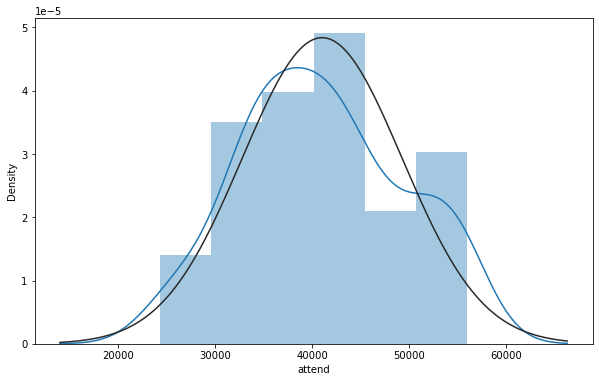

<Figure size 864x720 with 0 Axes>

In [39]:
from scipy.stats import norm
plt.figure(figsize=(10,6))
sns.distplot(df['attend'], fit=norm);
fig = plt.figure()